In [52]:
import numpy as np
import pandas as pd

In [53]:
df = pd.read_csv("data/chloramines.csv")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ph            3276 non-null   float64
 1   Hardness      3276 non-null   float64
 2   Solids        3276 non-null   float64
 3   Conductivity  3276 non-null   float64
 4   Turbidity     3276 non-null   float64
 5   Chloramines   3276 non-null   float64
dtypes: float64(6)
memory usage: 153.7 KB


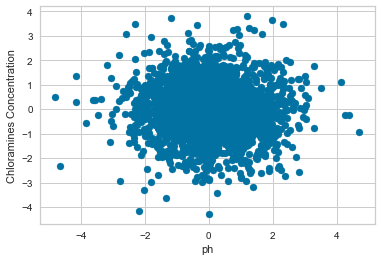

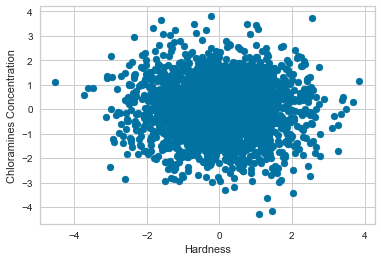

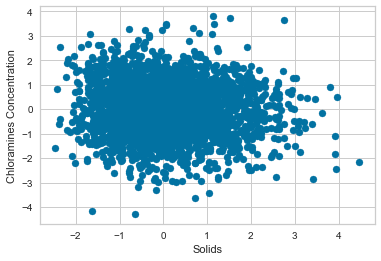

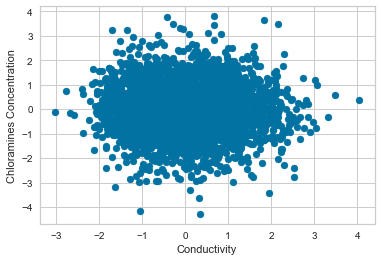

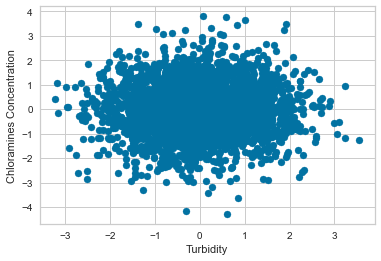

In [55]:
import matplotlib.pyplot as plt
for feature in range(len(df.columns)-1):
    plt.scatter(df[df.columns[feature]], df["Chloramines"])
    plt.xlabel(df.columns[feature])
    plt.ylabel("Chloramines Concentration")
    plt.show()

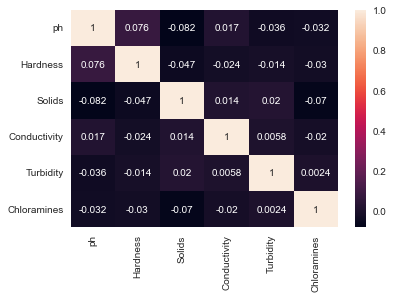

In [56]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
plt.show()

In [57]:
from pycaret.regression import *
regression = setup(df, target='Chloramines')
best_model = compare_models()
regression_results = pull()
print(regression_results)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:52:21
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)


                                    Model     MAE     MSE    RMSE      R2  \
omp           Orthogonal Matching Pursuit  0.7881  1.0193  1.0075  0.0024   
br                         Bayesian Ridge  0.7876  1.0194  1.0075  0.0024   
lr                      Linear Regression  0.7879  1.0199  1.0077  0.0021   
ridge                    Ridge Regression  0.7879  1.0199  1.0077  0.0021   
lar                Least Angle Regression  0.7879  1.0199  1.0077  0.0021   
huber                     Huber Regressor  0.7883  1.0204  1.0080  0.0015   
lasso                    Lasso Regression  0.7884  1.0238  1.0098 -0.0022   
dummy                     Dummy Regressor  0.7884  1.0238  1.0098 -0.0022   
llar         Lasso Least Angle Regression  0.7884  1.0238  1.0098 -0.0022   
en                            Elastic Net  0.7884  1.0238  1.0098 -0.0022   
ada                    AdaBoost Regressor  0.7894  1.0257  1.0108 -0.0043   
gbr           Gradient Boosting Regressor  0.7974  1.0499  1.0229 -0.0292   

In [58]:
import pickle 
pickle.dump(best_model, open("Chloramines_Regressor.pkl", "wb"))